 # uniform local binary pattern

 A local binary pattern is called uniform if the binary pattern contains at most two 0-1 or 1-0 transitions. For example, 00010000 (2 transitions) is a uniform pattern, but 01010100 (6 transitions) is not. In the computation of the LBP histogram, the histogram has a separate bin for every uniform pattern, and all non-uniform patterns are assigned to a single bin. Using uniform patterns, the length of the feature vector for a single cell reduces from 256 to 59. The 58 uniform binary patterns correspond to the integers 0, 1, 2, 3, 4, 6, 7, 8, 12, 14, 15, 16, 24, 28, 30, 31, 32, 48, 56, 60, 62, 63, 64, 96, 112, 120, 124, 126, 127, 128, 129, 131, 135, 143, 159, 191, 192, 193, 195, 199, 207, 223, 224, 225, 227, 231, 239, 240, 241, 243, 247, 248, 249, 251, 252, 253, 254 and 255.

- Convert the image to grayscale

- Define the neighborhood: Choose a neighborhood size (typically a square region of pixels around each central pixel).

- Compute LBP for each pixel: For each pixel in the image, compare the intenFor each pixel's three by three neighboor, compapre the center value and its neighboor values. If the neighboor values are greater than center, record 1 else record 0. This results in a binary pattern for each pixel.

- Uniform pattern classification: Once the binary pattern for each pixel is computed, classify each pattern into a uniform pattern. Uniform patterns are those where the binary pattern contains at most two bitwise transitions (0 to 1 or 1 to 0) when traversed circularly. For example, 00000000, 11110000, 10101010 are uniform patterns, while 11001010 is not. Assign a unique label to each uniform pattern.

- Compute histogram of uniform patterns: After classifying each pattern into a uniform pattern, compute a histogram of the uniform patterns in the image. This histogram represents the texture features of the image.

## Connecting the drive to get the image

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libreries

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

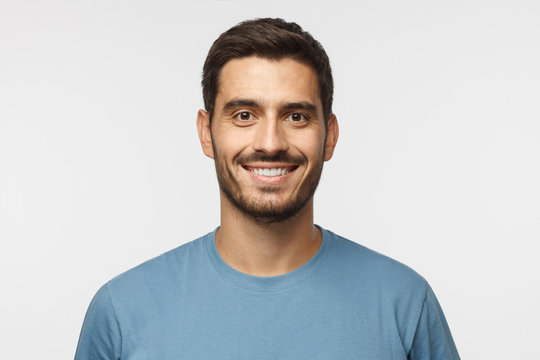

In [16]:
image_path = '/content/drive/MyDrive/medical_imaging/face_image.jpg'
image = cv2.imread(image_path)
cv2_imshow(image)

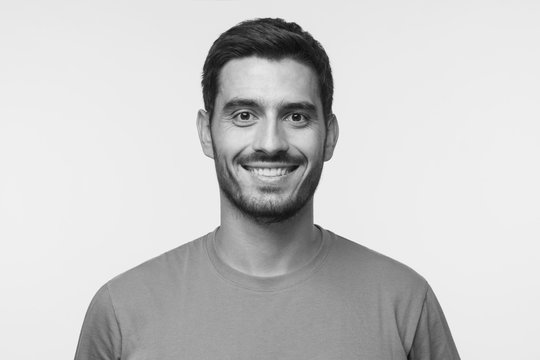

In [17]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_image)

## To detect if unofirm

In [19]:
def is_uniform_pattern(binary_string):
  transitions = 0
  origin = prev_value = binary_string[0]
  for bit in binary_string[1:]:
    if bit != prev_value:
      transitions += 1
    prev_value = bit
  if prev_value != origin:
    transitions += 1
  return transitions <= 2

## The LBP function

In [20]:
def ulbp(image):
  height, width = image.shape
  histogram = []
  treated_image = np.zeros((height, width), dtype=np.uint8)
  # we'll use this list to get the index of the uniforme pattern each time to help us create the histogram
  # if the number we got is not in the list we put it in the last bin
  uniform_patterns_in_decimal = [0, 1, 2, 3, 4, 6, 7, 8, 12, 14, 15, 16, 24, 28, 30, 31, 32,
                                  48, 56, 60, 62, 63, 64, 96, 112, 120, 124, 126, 127, 128,
                                  129, 131, 135, 143, 159, 191, 192, 193, 195, 199, 207, 223,
                                  224, 225, 227, 231, 239, 240, 241, 243, 247, 248, 249, 251,
                                  252, 253, 254, 255]

  for i in range(1, height -1):
    for j in range(1,width -1):
      center = image[i,j]
      voisinage = [image[i-1,j-1], image[i-1,j], image[i-1,j+1],
                   image[i,j+1], image[i+1,j+1], image[i+1,j],image[i+1,j-1], image[i,j-1]]
      binary_string = ""

      for ng in voisinage:
        binary_string += "1" if ng >= center else "0"

      if is_uniform_pattern(binary_string):
        treated_image[i,j] = int(binary_string, 2)
        uniform_pattern_index = uniform_patterns_in_decimal.index(int(binary_string, 2))
        histogram.append(uniform_pattern_index)
      else:
        treated_image[i,j] = int(binary_string, 2)
        histogram.append(58)


  return treated_image, histogram

## To Get the treated image and the histogram from the uniform lbp

In [28]:
treated_image, histogram = ulbp(gray_image)

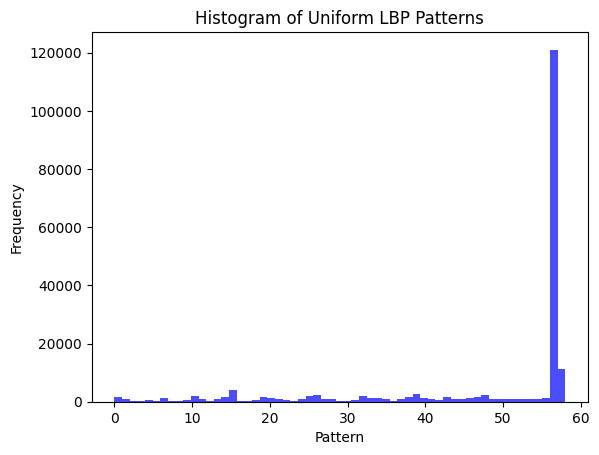

In [29]:
# Plot the histogram of uniform LBP patterns
plt.hist(histogram, bins=59, range=(0, 58), color='blue', alpha=0.7)
plt.title("Histogram of Uniform LBP Patterns")
plt.xlabel("Pattern")
plt.ylabel("Frequency")
plt.show()

In [30]:
def display_image_and_histogram(image, histogram):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Treated Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(histogram, bins=59, range=(0, 58), color='blue', alpha=0.7)
    plt.title("Histogram of Uniform LBP Patterns")
    plt.xlabel("Pattern")
    plt.ylabel("Frequency")
    plt.show()

    plt.tight_layout()
    plt.show()

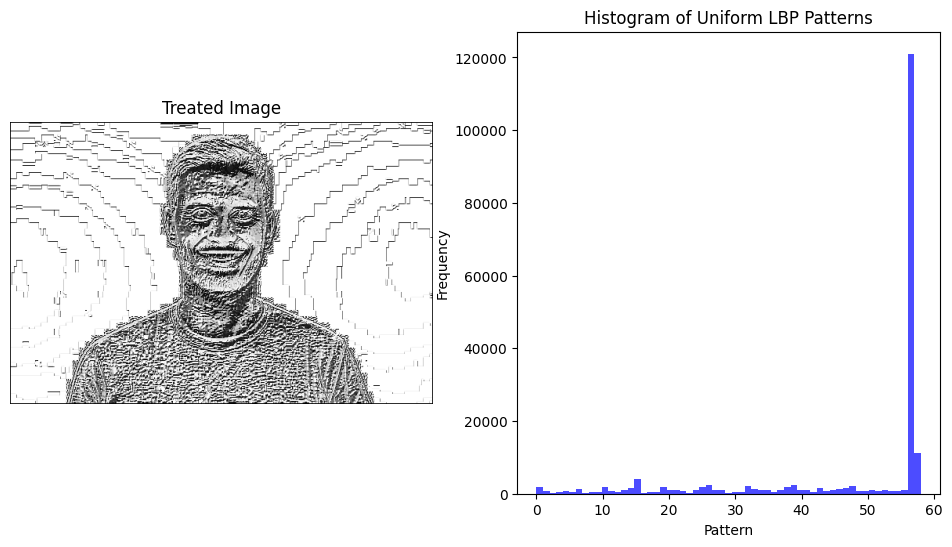

<Figure size 640x480 with 0 Axes>

In [31]:
display_image_and_histogram(treated_image, histogram)